In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [137]:
df1=pd.read_csv('anime(1).csv')
df2=pd.read_csv('rating(1).csv')

In [138]:
df1.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [139]:
#same format
df1['genre'] = df1['genre'].astype(str)
df1['genre'] = df1['genre'].str.split(',')
df1['genre'] = df1['genre'].apply(lambda x: ",".join(x) )

In [140]:
df1['genre'][1]

'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'

In [141]:
df1.head(15)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [142]:
df1['episodes'] = df1['episodes'].replace('Unknown', np.nan)

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [144]:
df1.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,25
episodes,340
rating,230
members,0


In [145]:
df1['rating'] = df1['rating'].fillna(df1['rating'].mean())
df1['type'] = df1['type'].fillna(df1['type'].mode()[0])
df1['type'] = df1['type'].fillna(df1['type'].mode()[0])
df1['episodes'] = df1['episodes'].fillna(df1['episodes'].astype(float).mean()) # Fill missing episode counts with the average

In [146]:
df1['type'].mode()[0]

'TV'

In [147]:
df1.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [148]:
print("shape of data before remove duplicates",df1.shape)
df1=df1.drop_duplicates()
print("shape of data after remove duplicates",df1.shape)

shape of data before remove duplicates (12294, 7)
shape of data after remove duplicates (12294, 7)


In [149]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
def clean_anime_name(name):
    # Remove HTML entities like &quot; and &amp;
    name = name.lower()
    name = re.sub(r'&.*;', '', name)
    name = re.sub(r'[^\w\s]', '', name)
    name = name.translate(str.maketrans('', '', string.punctuation))
    name = name.strip()
    # Normalize whitespace
    name = ' '.join(name.split())

    return name

# Apply the cleaning function to the 'name' column
df1['name'] = df1['name'].apply(clean_anime_name)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [150]:
df1

,anime_id,name,genre,type,episodes,rating,members
0,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,fullmetal alchemist brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,steinsgate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,toushindai my lover minami tai mechaminami,Hentai,OVA,1,4.15,211
12290,5543,under world,Hentai,OVA,1,4.28,183
12291,5621,violence gekiga david no hoshi,Hentai,OVA,4,4.88,219
12292,6133,violence gekiga shin david no hoshi inma densetsu,Hentai,OVA,1,4.98,175


In [151]:
numeric_names = df1['name'].str.contains('^\d+$')
print(df1[numeric_names]['name'].count())#remove numeric string

7


In [152]:
space_names = df1['name'].str.contains('^\s+') .replace(np.nan)
print(df1[space_names]['name'].count())#remove empty string

0


<ipython-input-152-1484c18038a1>:1: FutureWarning:

Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.



In [153]:
# Filter out names that are fully numbers or fully spaces
df1 = df1[~df1['name'].str.contains('^(?:\d+|\s+)$')]
df1 = df1[~df1['name'].str.contains('^.$')]

In [154]:
df1[['genre', 'name', 'type']]=df1[['genre', 'name', 'type']].astype('string')
df1['episodes']=df1['episodes'].astype('int')
df1['rating'] = np.ceil(df1['rating']).astype(int)

In [155]:
df1.shape

(12284, 7)

# ***Rating Dataset***

In [156]:
df2.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [157]:
df2['rating'] = df2['rating'].replace(-1,1)

In [158]:
df2.isnull().sum()

,0
user_id,0
anime_id,0
rating,0


In [159]:
df2=df2.dropna()

In [160]:
print("shape of data before remove duplicates",df2.shape)
df2=df2.drop_duplicates()
print("shape of data after remove duplicates",df2.shape)

shape of data before remove duplicates (7813737, 3)
shape of data after remove duplicates (7813736, 3)


In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7813736 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 238.5 MB


# **Merge** **Datasets**

In [162]:
df = pd.merge(df1, df2, on='anime_id')
df = df.rename(columns={'rating_x': 'rating', 'rating_y': 'user_rating'})

In [163]:
df.isna().sum().sum()

0

In [164]:
df=df.drop_duplicates()

In [165]:
df

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,10,200630,99,5
1,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,10,200630,152,10
2,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,10,200630,244,10
3,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,10,200630,271,10
4,32281,kimi no na wa,"Drama, Romance, School, Supernatural",Movie,1,10,200630,278,1
...,...,...,...,...,...,...,...,...,...
7801063,6133,violence gekiga shin david no hoshi inma densetsu,Hentai,OVA,1,5,175,39532,1
7801064,6133,violence gekiga shin david no hoshi inma densetsu,Hentai,OVA,1,5,175,48766,1
7801065,6133,violence gekiga shin david no hoshi inma densetsu,Hentai,OVA,1,5,175,60365,4
7801066,26081,yasuji no pornorama yacchimae,Hentai,Movie,1,6,142,27364,1


In [166]:
df.describe()

,anime_id,episodes,rating,members,user_id,user_rating
count,7.801068e+06,7.801068e+06,7.801068e+06,7.801068e+06,7.801068e+06,7.801068e+06
mean,8.904448e+03,1.844717e+01,8.155272e+00,1.785132e+05,3.672911e+04,6.521908e+00
std,8.887370e+03,3.511267e+01,7.288692e-01,1.882646e+05,2.099860e+04,3.018337e+00
min,1.000000e+00,1.000000e+00,2.000000e+00,2.900000e+01,1.000000e+00,1.000000e+00
25%,1.240000e+03,2.000000e+00,8.000000e+00,4.400900e+04,1.897400e+04,6.000000e+00
50%,6.211000e+03,1.200000e+01,8.000000e+00,1.103040e+05,3.679100e+04,7.000000e+00
75%,1.407500e+04,2.400000e+01,9.000000e+00,2.441930e+05,5.475900e+04,9.000000e+00
max,3.451900e+04,1.818000e+03,1.000000e+01,1.013917e+06,7.351600e+04,1.000000e+01


In [167]:
df['rating'].unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [168]:
df.shape

(7801068, 9)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801068 entries, 0 to 7801067
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   anime_id     int64 
 1   name         string
 2   genre        string
 3   type         string
 4   episodes     int64 
 5   rating       int64 
 6   members      int64 
 7   user_id      int64 
 8   user_rating  int64 
dtypes: int64(6), string(3)
memory usage: 535.7 MB


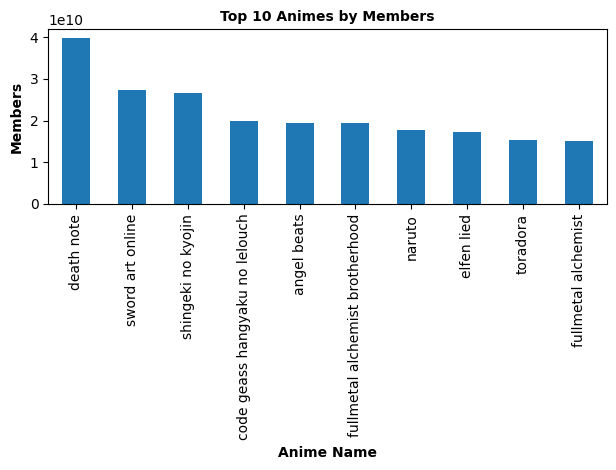

In [170]:



top_animes1 = df.groupby('name')['members'].sum().sort_values(ascending=False).head(10)
top_animes1.plot(kind='bar')
plt.title('Top 10 Animes by Members',fontsize=10, fontweight='bold')
plt.xlabel('Anime Name',fontsize=10, fontweight='bold')
plt.ylabel('Members',fontsize=10, fontweight='bold')
plt.tight_layout()



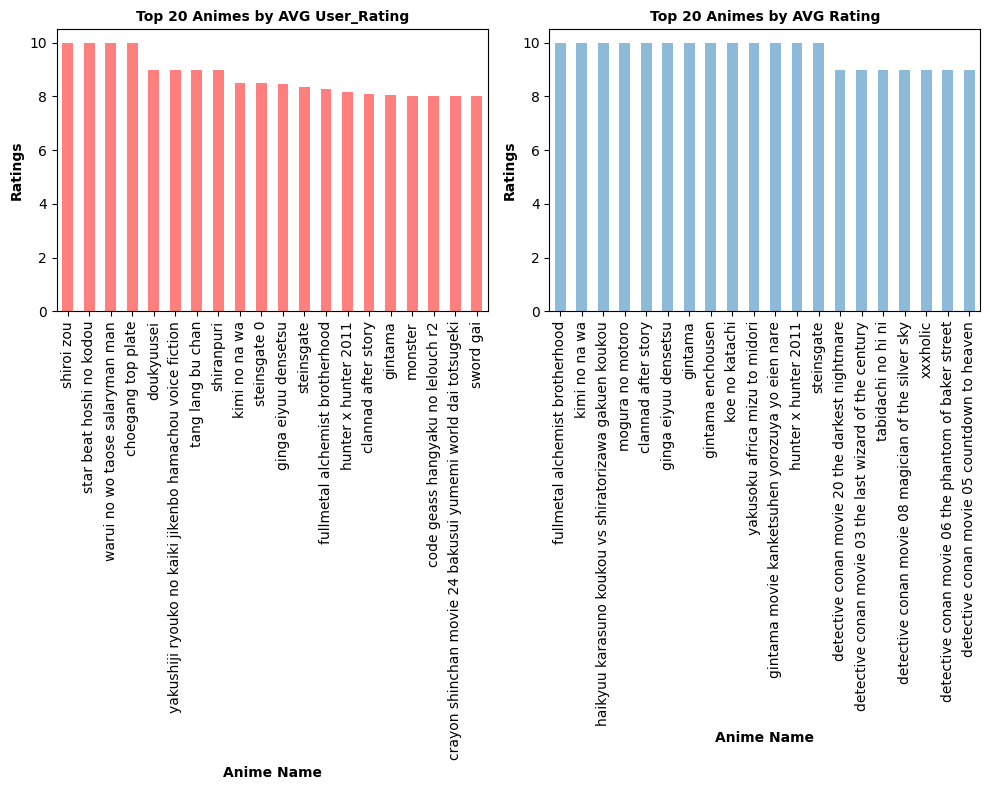

In [171]:

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
top_animes2 = df.groupby('name')['user_rating'].mean().sort_values(ascending=False).head(20)
top_animes2.plot(kind='bar',color='red',alpha=0.5) # Remove fontweight argument here
plt.title('Top 20 Animes by AVG User_Rating',fontsize=10, fontweight='bold')
plt.xlabel('Anime Name',fontsize=10, fontweight='bold')
plt.ylabel('Ratings',fontsize=10, fontweight='bold')
plt.tight_layout() # Adjust layout for better spacing

plt.subplot(1, 2, 2)
top_animes3 = df.groupby('name')['rating'].mean().sort_values(ascending=False).head(20)
top_animes3.plot(kind='bar',alpha=0.5) # Remove fontweight argument here
plt.title('Top 20 Animes by AVG Rating',fontsize=10, fontweight='bold')
plt.xlabel('Anime Name',fontsize=10, fontweight='bold')
plt.ylabel('Ratings',fontsize=10, fontweight='bold')
plt.tight_layout() # Adjust layout for better spacing

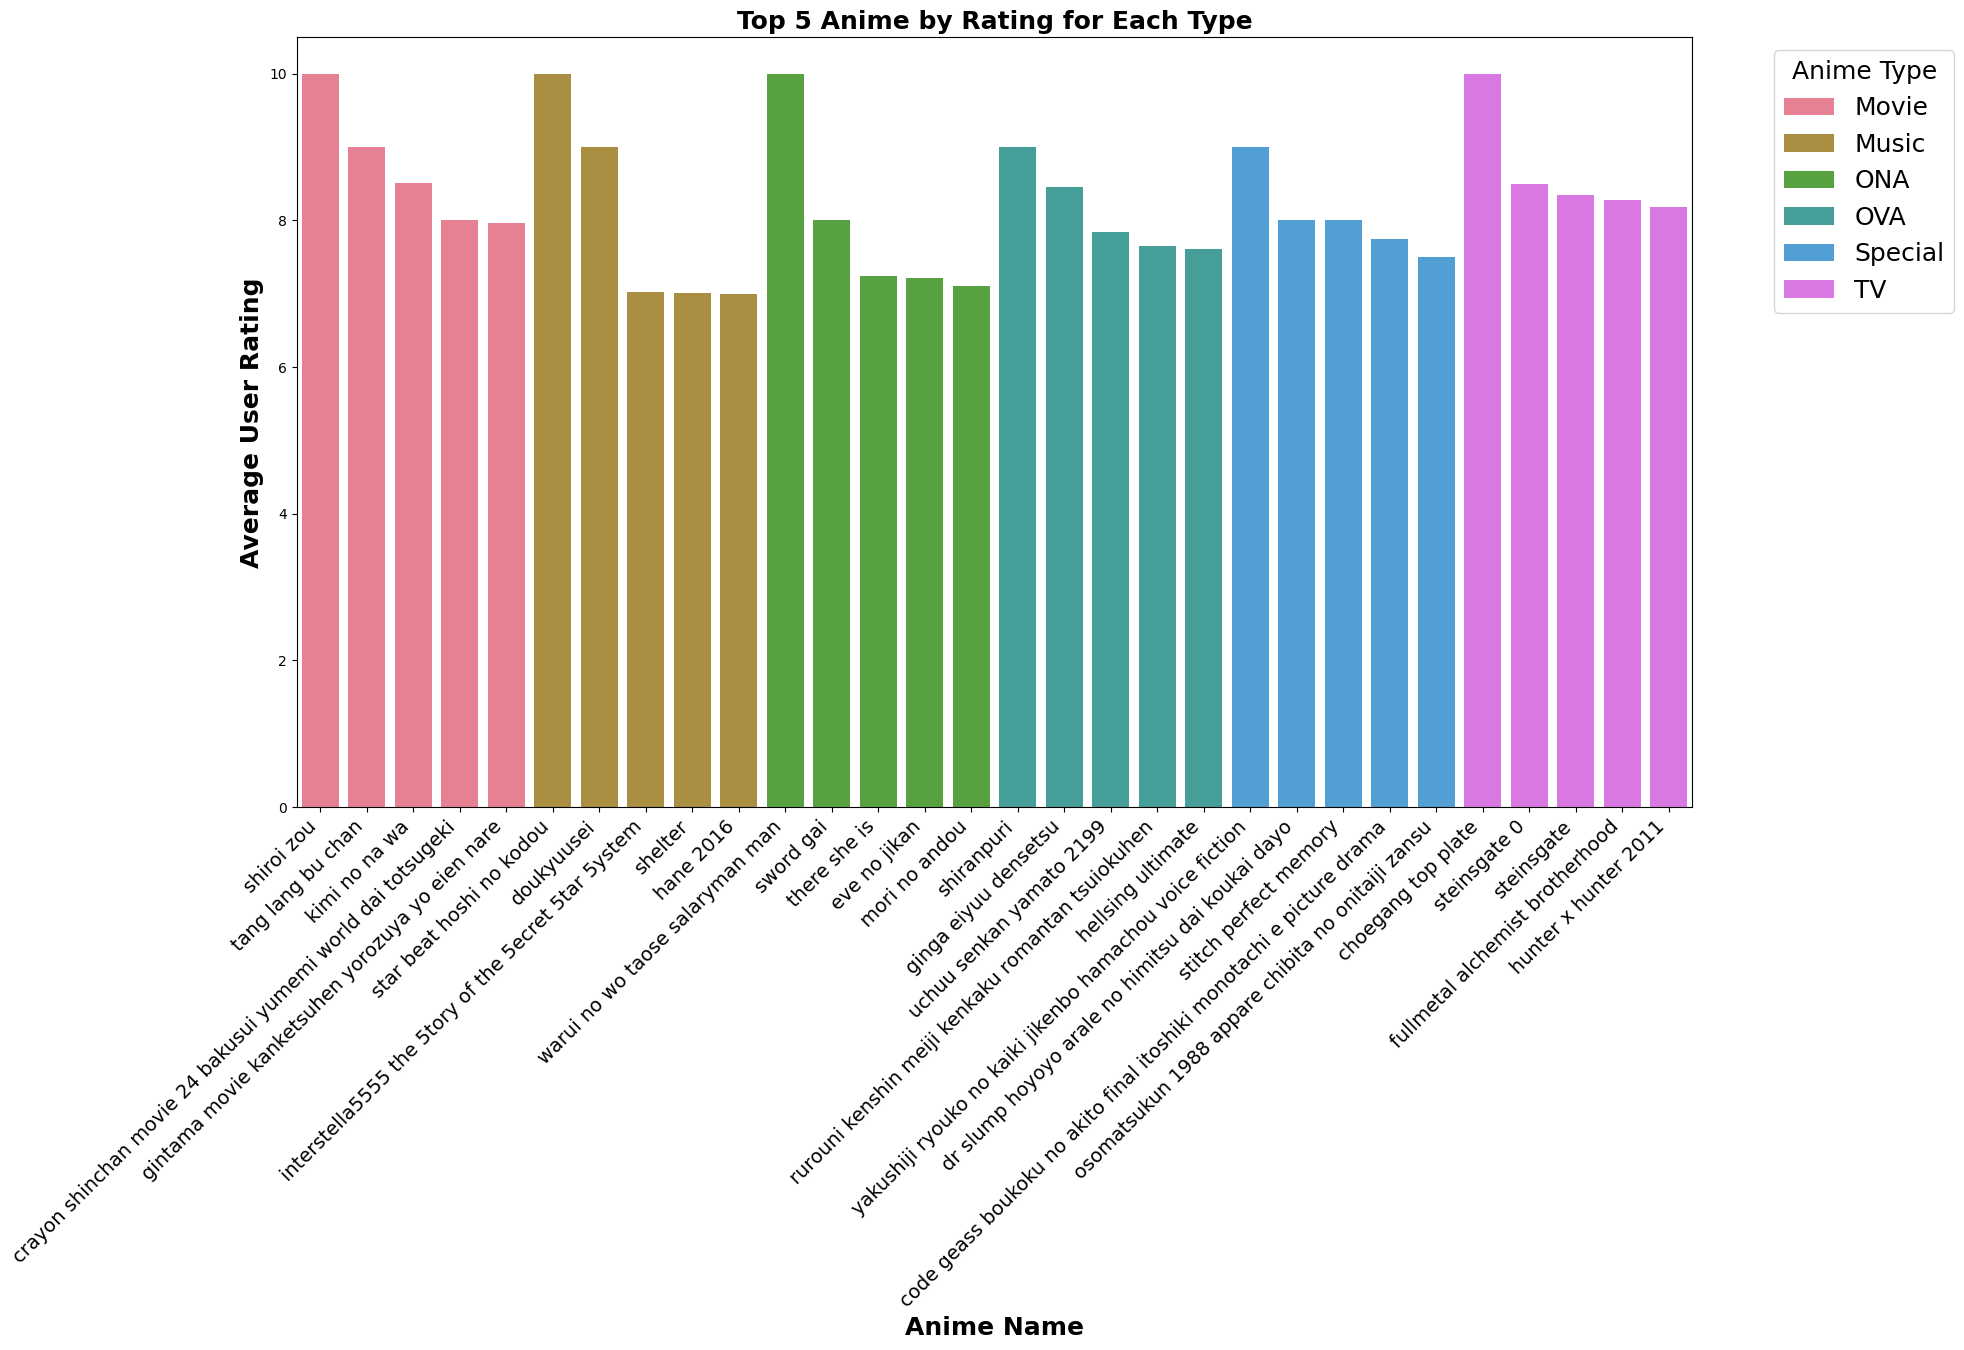

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe containing the data

# Group by 'type' and 'name' and calculate the mean of 'user_rating'
top_animes3 = df.groupby(['type', 'name'])['user_rating'].mean().reset_index()

# Sort the values within each type by 'user_rating' in descending order
top_animes3 = top_animes3.sort_values(['type', 'user_rating'], ascending=[True, False])

# Get the top 5 anime names for each type
top_animes3_top5 = top_animes3.groupby('type').head(5)

# Define custom colors for each type
custom_palette = sns.color_palette("husl", n_colors=top_animes3_top5['type'].nunique())

# Plotting the clustered vertical bar chart with no distance between groups and custom colors
plt.figure(figsize=(18, 10))
sns.barplot(x='name', y='user_rating', hue='type', data=top_animes3_top5, dodge=False, palette=custom_palette)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right',fontsize=14)

# Add title and labels
plt.title('Top 5 Anime by Rating for Each Type',fontsize=18, fontweight='bold')
plt.xlabel('Anime Name',fontsize=18, fontweight='bold')
plt.ylabel('Average User Rating',fontsize=18, fontweight='bold')

# Adjust the legend: make it bigger and change its position
plt.legend(title='Anime Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=18)

# Display the plot
plt.show()


In [173]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your dataframe containing the data

# Count the occurrences of each type
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

# Create a pie chart using Plotly
fig = px.pie(type_counts, names='type', values='count', title='Distribution of Anime Types')

# Customize the pie chart
fig.update_traces(textinfo='percent+label', pull=[0.1]*len(type_counts))  # Pull slices slightly outward for emphasis
fig.update_layout(title_font_size=20, title_x=0.5)

# Show the plot
fig.show()


In [174]:
df['genre'].value_counts().reset_index().sort_values(by='count', ascending=False).head(5)

,genre,count
0,Hentai,62435
1,"Comedy, School, Slice of Life",61404
2,Comedy,54142
3,"Comedy, Slice of Life",52569
4,"Action, Adventure, Fantasy, Game, Romance",50051


In [175]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Calculate top 5 genres
top_5_genres = df['genre'].value_counts().reset_index().sort_values(by='count', ascending=False).head(5)

# Choose a base color (e.g., blue)
base_color = 'rgb(0, 1, 255)'

# Create a list of colors with decreasing opacity, except for the last one
colors = [
    'rgba({}, {})'.format(
        base_color.strip('rgb()'),
         (i+0.40) / len(top_5_genres)
    )
    for i in range(len(top_5_genres) )  # Calculate for all but the last bar
]
colors.append(base_color)  # Append the fully opaque base color for the last bar

# Create Plotly bar chart
fig = px.bar(top_5_genres, x='genre', y='count',
             labels={'genre': 'Genre', 'count': 'Number of Animes'},
             title='Top 5 Anime Genres'
            )

# Update bar colors
fig.update_traces(marker_color=colors)

# Customize chart appearance
fig.update_layout(title_font_size=20, title_x=0.5)

# Display the chart
fig.show()

In [176]:
import pandas as pd

# Assuming 'df' is your dataframe containing the data

# Split genres and explode to get individual genre counts
genre_counts = df['genre'].str.split(', ').explode().value_counts().head(5)

print(genre_counts)

genre
Comedy     3908774
Action     3250851
Romance    2485711
Drama      2099125
Fantasy    2019103
Name: count, dtype: int64


In [177]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your dataframe containing the data

# Split genres, explode, and count occurrences
genre_counts = df['genre'].str.split(', ').explode().value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Select top 5 genres
top_5_genres = genre_counts.head(5)

# Create a pie chart using Plotly
fig = px.pie(top_5_genres, names='genre', values='count',
             title='Top 5 Anime Genres')

# Customize the pie chart
fig.update_traces(textinfo='percent+label')
fig.update_layout(title_font_size=20, title_x=0.5)

# Show the plot
fig.show()

In [178]:
genre_counts = df['genre'].str.split(',').explode().value_counts().sort_values(ascending=False).head(20)
genre_counts

,count
genre,
Action,3250851
Romance,2416147
Comedy,2391315
Supernatural,1953939
Fantasy,1926774
School,1873995
Shounen,1870489
Sci-Fi,1559206
Comedy,1517459


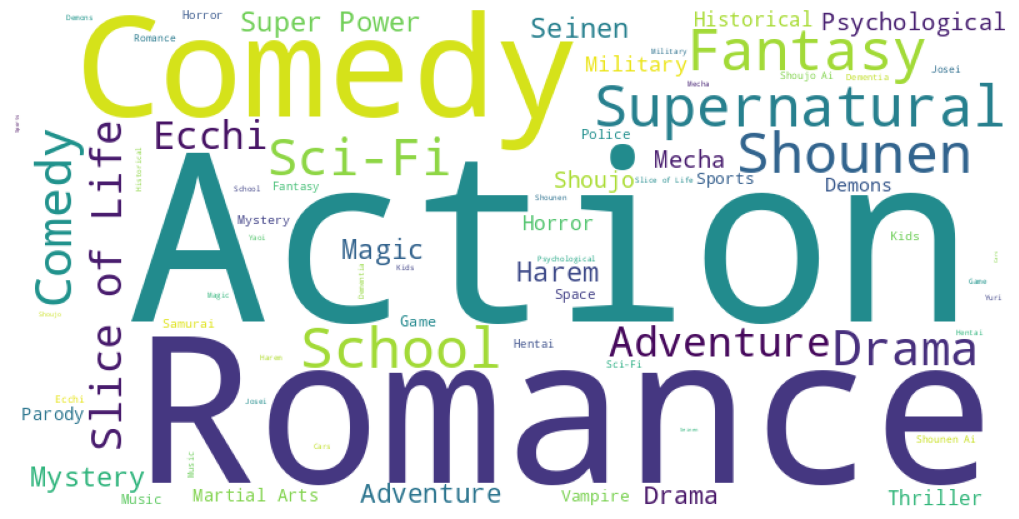

In [179]:
!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

genre_counts = df['genre'].str.split(',').explode().value_counts().sort_values(ascending=False)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Display the generated image:
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [180]:
v=df['type'].value_counts().reset_index().sort_values(by='count', ascending=False)
v

,type,count
0,TV,5271047
1,Movie,1051913
2,OVA,800304
3,Special,559366
4,ONA,91944
5,Music,26494


In [181]:
import pandas as pd
import plotly.express as px

type_counts = df['type'].value_counts().reset_index().sort_values(by='count', ascending=False)

fig = px.area(type_counts, x='type', y='count',
             labels={'index': 'Type', 'count': 'Count'},
             title='Distribution of Anime Types (Area Chart)')

fig.update_traces(mode='lines+markers+text', text=type_counts['count'], textposition='top center')
fig.update_layout(title_font_size=20, title_x=0.5)

fig.show()

In [182]:
import pandas as pd
import plotly.express as px

fig = px.bar(v, x='type', y='count', color='type',
             title='Distribution of Anime Types (Categorical Plot)')

fig.update_layout(title_font_size=20, title_x=0.5,
                  xaxis_title='Type', yaxis_title='Count')

fig.show()

In [183]:
top_types = df.groupby('type')['members'].sum().sort_values(ascending=False)
top_types

,members
type,
TV,1217021458064
Movie,112030442073
OVA,35277331600
Special,23750115965
ONA,4111267751
Music,402904258


In [184]:
import plotly.express as px

# Assuming 'top_types' is a pandas Series with anime types as index and member counts as values
fig = px.pie(top_types, values=top_types.values, names=top_types.index,
             title='Distribution of Top Anime Types by members', hole=0.4)  # hole creates the donut

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_font_size=20, title_x=0.5)

fig.show()

In [185]:
top_types1 = df.groupby('type')[['rating','user_rating']].mean()
top_types1

,rating,user_rating
type,,
Movie,8.290994,6.541604
Music,7.590398,5.659848
ONA,7.528430,5.885909
OVA,7.705539,5.884992
Special,7.856361,5.872035
TV,8.241964,6.699072


In [186]:
import plotly.express as px

top_types1 = df.groupby('type')[['rating','user_rating']].mean().sort_values(by='rating', ascending=False)

# Melt the DataFrame to long format for easier plotting with Plotly Express
top_types1_melted = top_types1.melt(ignore_index=False, var_name='Rating Type', value_name='Mean Rating')

fig = px.bar(top_types1_melted, x=top_types1_melted.index, y='Mean Rating', color='Rating Type',
             title='Mean Ratings and User Ratings by Anime Type',
             labels={'type': 'Anime Type'})

fig.update_layout(title_font_size=20, title_x=0.5,
                  xaxis_title='Anime Type', yaxis_title='Mean Rating')

fig.show()


In [187]:
import plotly.express as px

top_types1 = df.groupby('type')[['rating','user_rating']].mean().sort_values(by='rating', ascending=False)

# Melt the DataFrame to long format for easier plotting with Plotly Express
top_types1_melted = top_types1.melt(ignore_index=False, var_name='Rating Type', value_name='Mean Rating')

fig = px.bar(top_types1_melted, x=top_types1_melted.index, y='Mean Rating', color='Rating Type',
             title='Mean Ratings and User Ratings by Anime Type',
             labels={'type': 'Anime Type'},
             barmode='group')  # Set barmode to 'group' for clustered bars

fig.update_layout(title_font_size=20, title_x=0.5,
                  xaxis_title='Anime Type', yaxis_title='Mean Rating')

fig.show()